In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as plt

In [16]:
def cost_function_torch(param):
    return (param - 3)**2

In [17]:
class AdagradOptimizer:
    def __init__(self, initial_param, learning_rate, eps=1e-8):
        self.param = torch.tensor(initial_param, requires_grad=True, dtype=torch.float32)
        self.lr = learning_rate
        self.eps = eps
        self.sum_sq_gradients = torch.tensor(0.0, dtype=torch.float32)
    
    def step(self):
        cost = cost_function_torch(self.param)
        cost.backward()
        grad = self.param.grad.data

        self.sum_sq_gradients.add_(grad * grad)
        
        with torch.no_grad():
            adaptive_lr = self.lr / torch.sqrt(self.sum_sq_gradients + self.eps)
            self.param.data -= adaptive_lr * grad
            
            if self.param.grad is not None:
                self.param.grad.zero_()
    
    def get_param(self):
        return self.param.item()


In [18]:
def run_optimization(optimizer, num_iterations):
    x_history = [optimizer.get_param()]
    cost_history = [cost_function_torch(optimizer.param).item()]

    for i in range(num_iterations):
        optimizer.step()
        x_history.append(optimizer.get_param())
        cost_history.append(cost_function_torch(optimizer.param).item())
    
    return x_history, cost_history

def visualize_results(x_history, cost_history, title="Adagrad Optimization"):
    x_plot = np.linspace(0, 6, 100)
    y_plot = (x_plot - 3)**2

    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, label='Cost Function')
    plt.plot(x_history, cost_history, marker='o', linestyle='--', color='green', label='Adagrad Path')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.show()

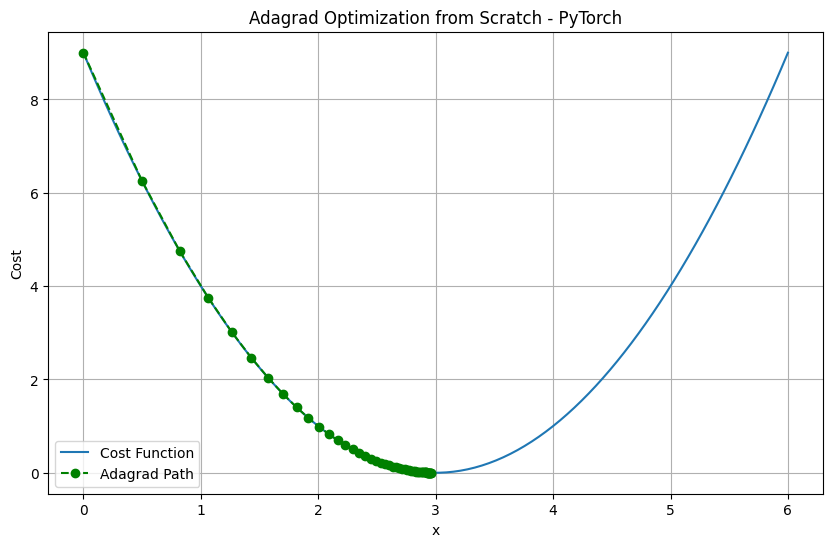

Final x value: 2.9616
Final cost: 0.0015


In [19]:
def main():
    initial_x = 0.0
    learning_rate = 0.5
    num_iterations = 50

    optimizer = AdagradOptimizer(initial_x, learning_rate)

    x_history, cost_history = run_optimization(optimizer, num_iterations)

    visualize_results(x_history, cost_history, "Adagrad Optimization from Scratch - PyTorch")

    print(f"Final x value: {x_history[-1]:.4f}")
    print(f"Final cost: {cost_history[-1]:.4f}")

if __name__ == "__main__":
    main()